# Part II - Ford GoBike System Data Exploration

## by Akbarali Mukhammadiev

## Investigation Overview


> I would like to investigate the dataset concerning the individual rides made in a bike-sharing system covering the greater San Francisco Bay area, United States in 2019. My exploration and visualization study primarily focuses on finding the bike usage pattern and customer habit characteristics from the 2nd month ride trips data in 2019. There are univariate, bivariate as well as multivariate investigations will be presented. 


## Dataset Overview

> The given dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area, United States. The attributes included the trip start/end time, as well as additional measurements such as user type, gender, and age. Over 183000 data points are given in the dataset in overall 16 columns.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df_clean = df.copy()
# wrangling part
# Changing data types
df_clean.dropna(subset=['start_station_id', 'start_station_name', 'member_birth_year'], inplace=True)
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype('int')
df_clean['start_station_id'] = df_clean['start_station_id'].astype('object')
df_clean['end_station_id'] =df_clean['end_station_id'].astype('object')
df_clean['start_time'] =  pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] =  pd.to_datetime(df_clean['end_time'])   
# determining new variables
df_clean['start_date'] = df_clean.start_time.dt.strftime('%Y-%m-%d')
df_clean['start_hour'] = df_clean.start_time.dt.strftime('%H')
df_clean['start_day'] = df_clean.start_time.dt.strftime('%A')
df_clean['start_month'] = df_clean.start_time.dt.strftime('%B')

## Distribution of hourly and daily rides

> In this visualization, I will consider the information concerning the travel starting hours and the days when the travels took place. The most frequent hour of the day is 5:00 pm and the least frequent is after midnight. This is probably due to the fact that everyone returned home from their offices. the usage of bikes correspond to 24 hours in a day. Thursday is the day that the most rides took place following by Tuesday, Wdnesday etc. The weekends are the less popular days among travellers.

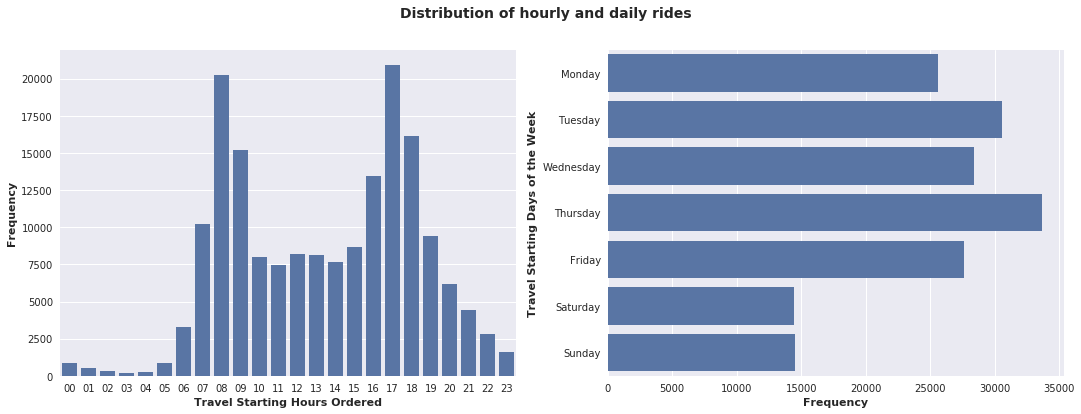

In [3]:
# Setting the size of the plot
plt.figure(figsize = [18, 6])

#Setting the color of the plot
base_color = sb.color_palette()[0]

# Ordering the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# PLOT ON LEFT
plt.subplot(1, 2, 1)
#type_order = df_clean['start_hour'].value_counts().index
sb.countplot(data=df_clean, x='start_hour', color=base_color);
plt.xlabel('Travel Starting Hours Ordered', weight='bold');
plt.ylabel('Frequency', weight='bold');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
type_order = df_clean['start_day'].value_counts().index
sb.countplot(data=df_clean, y='start_day', color=base_color, order=day_order);
plt.xlabel('Frequency', weight='bold');
plt.ylabel('Travel Starting Days of the Week', weight='bold');
plt.suptitle('Distribution of hourly and daily rides', weight='bold', fontsize=14);

## Length of travel vs. gender and types of users

> Here, I will present the visualizations that shows there doesn't exist that much difference in terms of travel durations between men and women. Whereas, there exists difference in terms of travel durations between subscribers and non-subscribers. Non-subscribers had wider travel durations compared to subscribers of the company. Furthermore, similarly as in the case of travel durations compared with ages, the most of the subscribers are youngesters whereas non-subscribers are slightly older than subscribers.

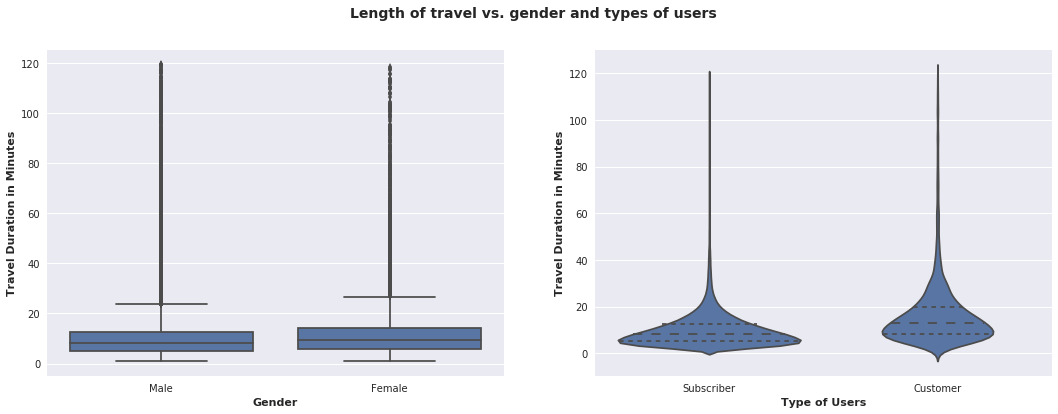

In [4]:
# Preliminary setup
df_clean = df_clean[df_clean['member_gender'] != 'Other'].copy()

# Setting us the color of the plot
plt.figure(figsize = [18, 6])

# Converting to minutes from seconds
df_clean['duration_min'] = df_clean['duration_sec'] / 60

# Removing outliers regarding the average travel duration of the users
df_clean = df_clean[df_clean['duration_min'] <= 120]

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.boxplot(data=df_clean, x='member_gender', y='duration_min', color=base_color);
plt.xlabel('Gender', weight='bold');
plt.ylabel('Travel Duration in Minutes', weight='bold');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
sb.violinplot(data=df_clean, x='user_type', y='duration_min', color=base_color, inner='quartile');
plt.xlabel('Type of Users', weight='bold');
plt.ylabel('Travel Duration in Minutes', weight='bold');
plt.suptitle('Length of travel vs. gender and types of users', fontsize=14, weight='bold');

## Travel durations during the week for different type of users

> In the final slide, I would like to present he fact that concerning the correation between the ages of the users and the average travel duration. We can see rather slightly negative correlation after the age of 20 between the two. After the age of 20, younger people travelled more than the older people. Moreover, the longest travel durations correspond the age interval between 20 and 30. Travel duration starts decreasing after the age 20.

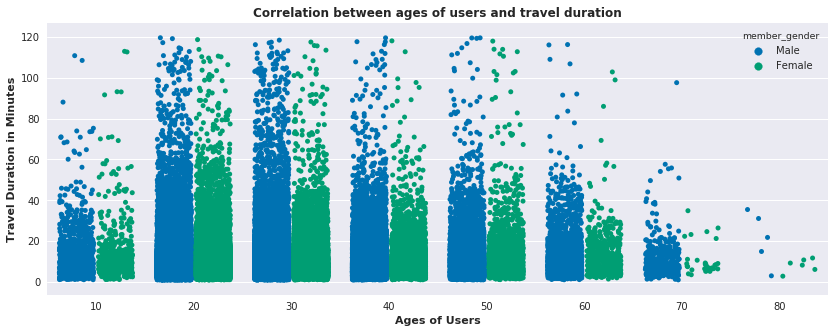

In [7]:
# Creating the ages column of the datset
df_clean['ages'] = 2019 - df_clean['member_birth_year']

# removing outliers from the dataset
df_clean = df_clean[df_clean['ages'] <= 80]

# Creating the age intervals
df_clean['age_intervals'] = ((df_clean['ages']//10)*10)

# Setting up the color of the plot
plt.figure(figsize = [14, 5])

# plotting the dataset
sb.stripplot(data=df_clean, x='age_intervals', y='duration_min', hue='member_gender', palette='colorblind', jitter=0.35, dodge=True);
plt.title('Correlation between ages of users and travel duration', weight='bold');
plt.xlabel('Ages of Users', weight='bold');
plt.ylabel('Travel Duration in Minutes', weight='bold');

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 352313 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 